<a href="https://colab.research.google.com/github/shreyanshhub/Air-Quality-Analysis/blob/main/AQI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import all necessary modules

In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tqdm import tqdm
from matplotlib import pyplot as plt

#Load data, remember to save the file as data.csv in the session memory storage

In [2]:
data=pd.read_csv('data.csv')

#Preprocess data

In [3]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data['Date']=data["Timestamp"].dt.date
year=data.loc[:,['Year','PM2.5']]
month=data.loc[:,['Month','PM2.5']]
day=data.loc[:,['Day','PM2.5']]
hour=data.loc[:,['Hour','PM2.5']]
date=pd.DataFrame(data.groupby('Date')['PM2.5'].mean())

#Split data into train and test data , I have used the 80/20 method



In [4]:
dataset  = date.values
training_data_len = math.ceil(len(dataset)*.8)

#I have used the Standardization procedure for scaling data rather than Min-Max Scaling as it produced better results

In [5]:
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)

In [6]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
num = 60
for i in range(num, len(train_data)):
    x_train.append(train_data[i-num:i , 0])
    y_train.append(train_data[i , 0])

In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#Long Short Term Memory Neural Network setup , I have used the standard setup with two LSTM with 50 neurons each and 1 hidden layer with 25 neurons and 1 output layer

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Have used RMSprop optimizer, you can try out adam as well , rmsprop gave better results

In [9]:
model.compile(optimizer = "rmsprop", loss = "mean_squared_error")

In [ ]:
model.fit(x_train,y_train, batch_size=1, epochs=1)

  73/1233 [>.............................] - ETA: 51s - loss: 0.2333

In [ ]:
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(num, len(test_data)):
      x_test.append(test_data[i-num:i, 0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Making out predictions on test data

In [ ]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

#Used RMSE instead of MSE , the RMSE we got is good for this model

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [ ]:
train = date[:training_data_len]
sample = date[training_data_len:]
sample["Predictions"] = predictions
sample[abs(sample["Predictions"]-sample["PM2.5"])<1]

#Data Visualization

Import necessary plotting tools

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


PM2.5 plot over time

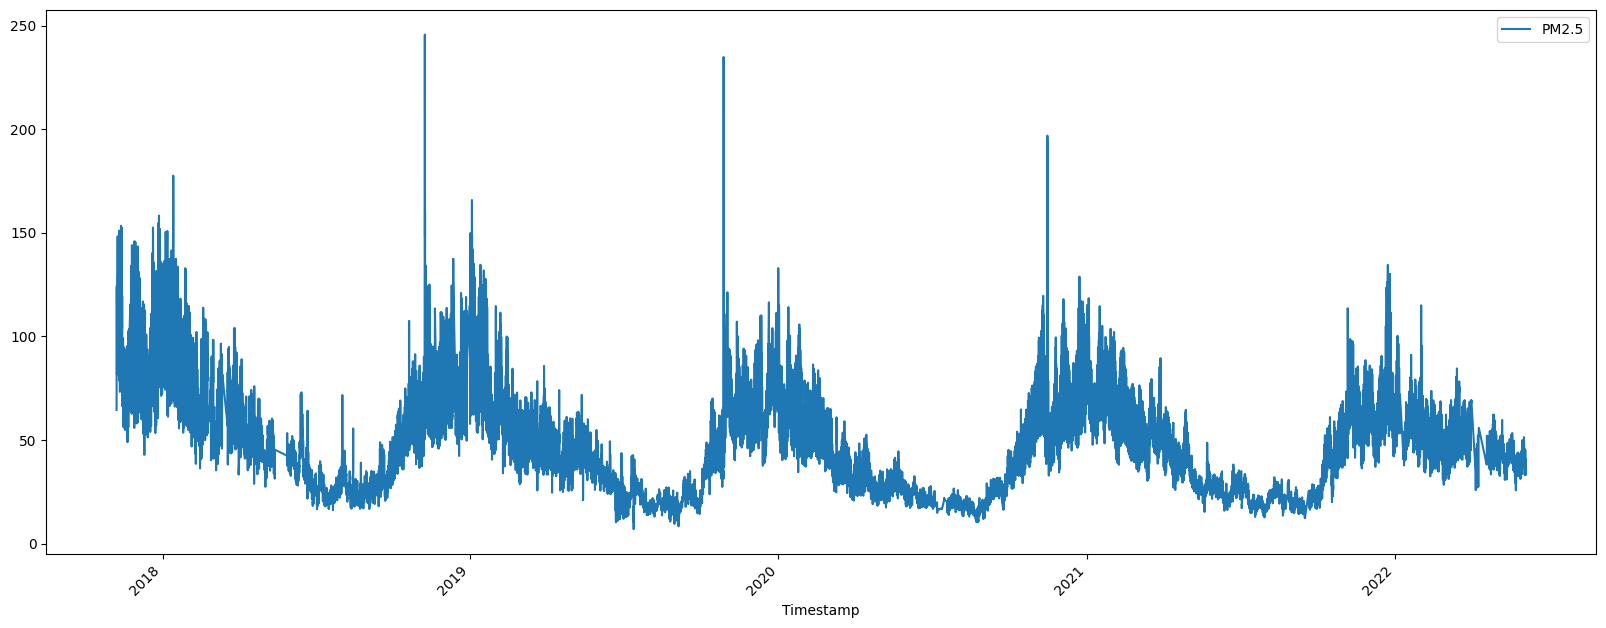

In [17]:
data.plot(x='Timestamp',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)

plt.show()

Average PM2.5 plot over time

<Axes: xlabel='Year'>

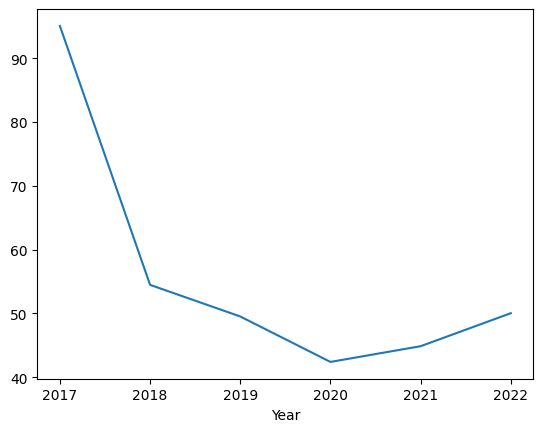

In [18]:
data.groupby('Year')['PM2.5'].mean().plot()

Quartiles in box plot over time

<Axes: xlabel='Year', ylabel='PM2.5'>

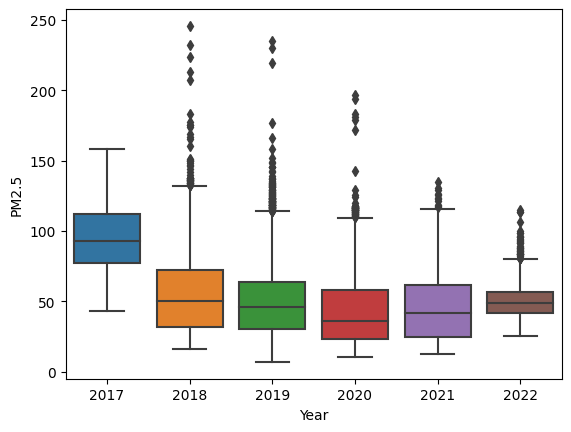

In [20]:

sns.boxplot(x='Year', y='PM2.5',data=year)

Monthly PM2.5 average plot

<Axes: xlabel='Month'>

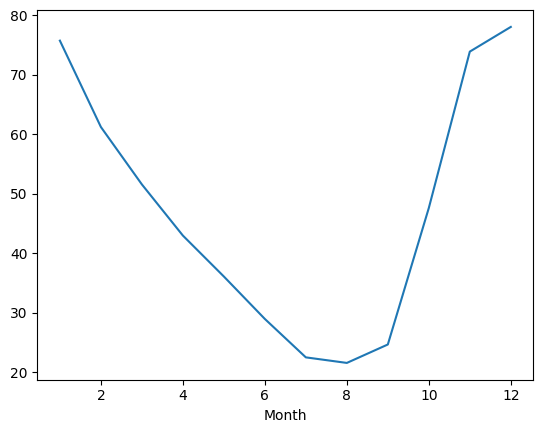

In [22]:
data.groupby('Month')['PM2.5'].mean().plot()

Daily PM2.5 average plot

<Axes: xlabel='Day'>

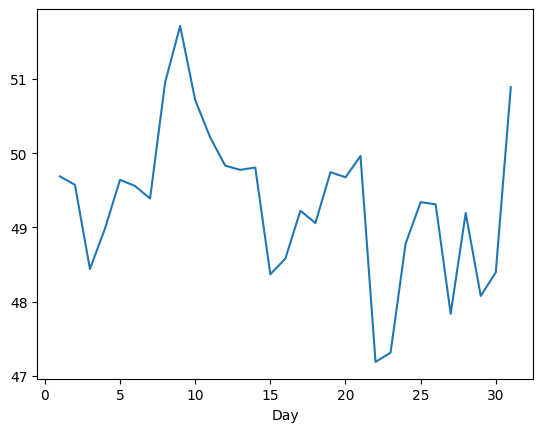

In [23]:
data.groupby('Day')['PM2.5'].mean().plot()

Boxplot analysis on daily basis

<Axes: xlabel='Day', ylabel='PM2.5'>

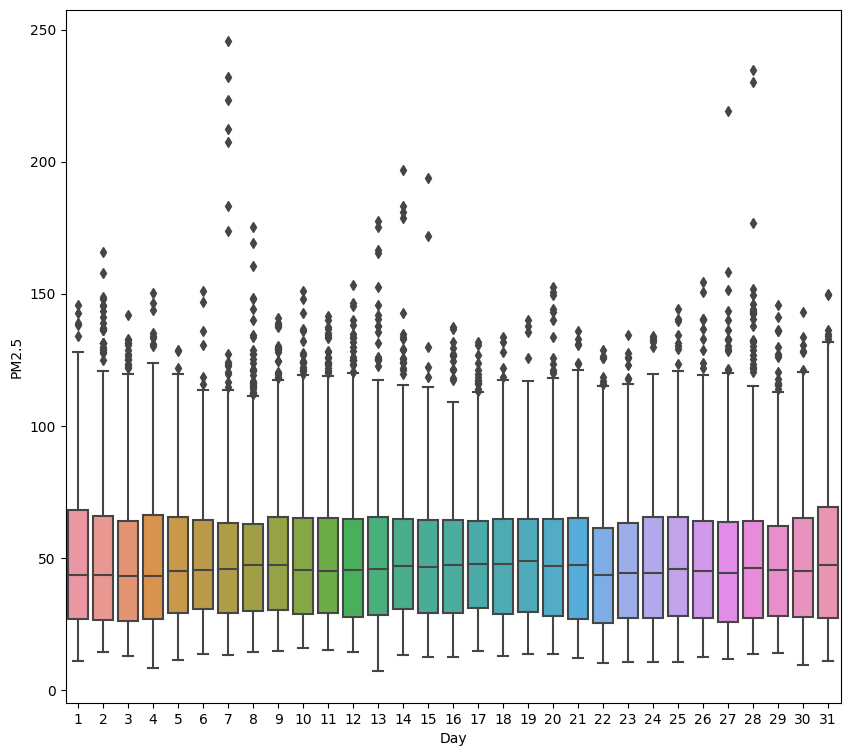

In [25]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Day', y='PM2.5',data=day)

Average PM2.5 analysis on hourly basis

<Axes: xlabel='Hour'>

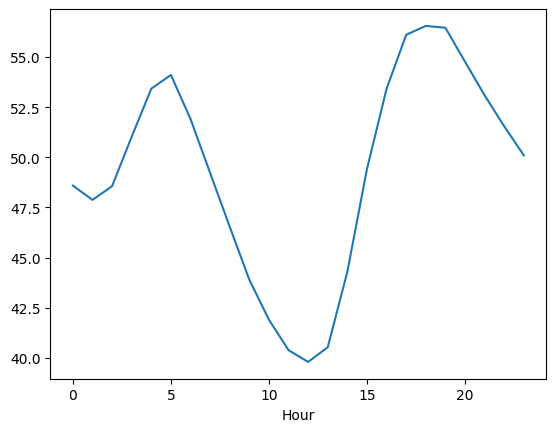

In [26]:
data.groupby('Hour')['PM2.5'].mean().plot()

#Visualization of our predictions

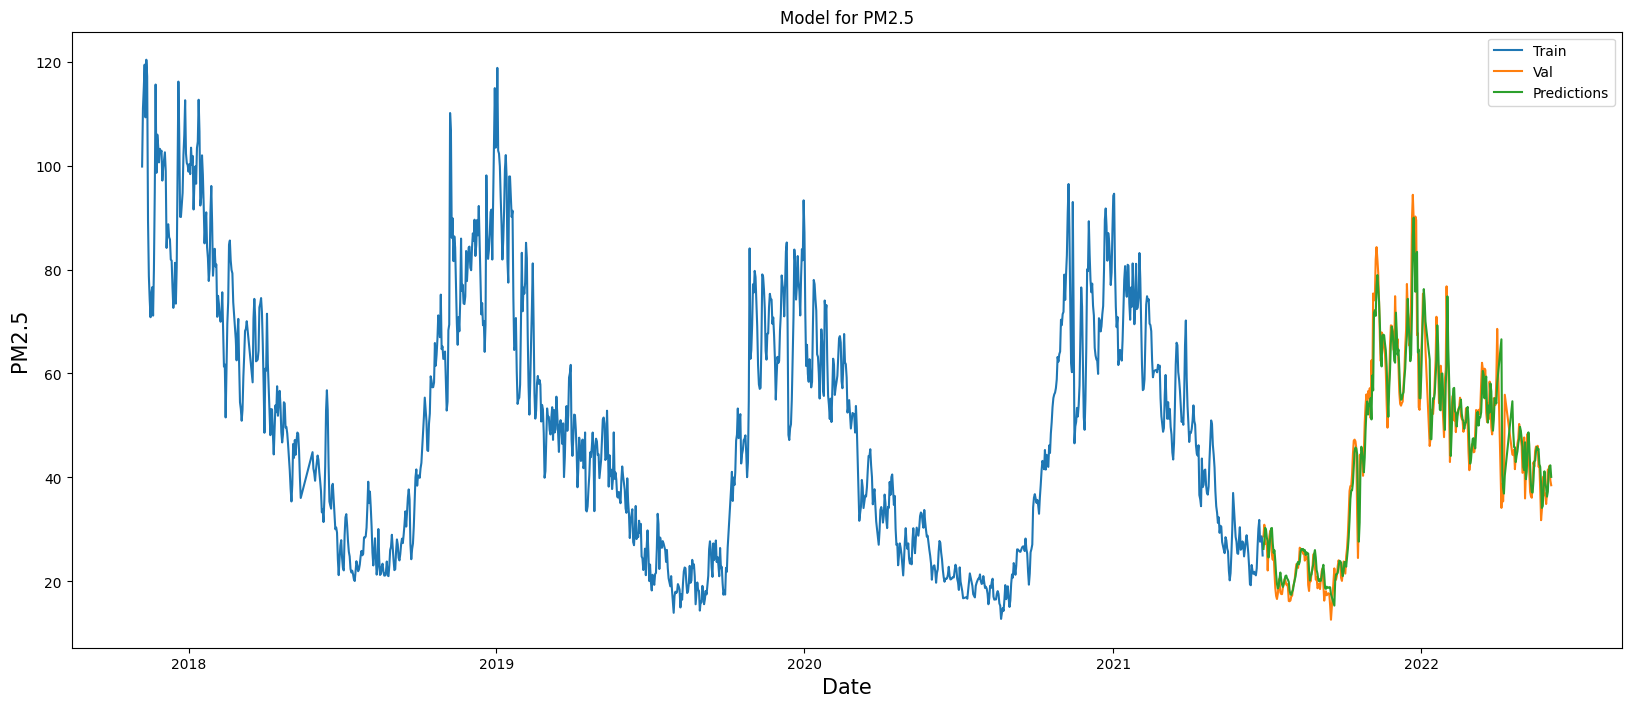

In [27]:
plt.figure(figsize=(20,8))
plt.title("Model for PM2.5")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("PM2.5",fontsize=15)
plt.plot(train[date.columns])
plt.plot(sample['PM2.5'])
plt.plot(sample["Predictions"])
plt.legend(["Train","Val","Predictions"])